# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [4]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import skimage.exposure as ex
# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray
from skimage.color import hsv2rgb

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [6]:
def negative(image):
    negative_image = np.copy(image)/image.max()
   
    return 1 - negative_image #applygin negative transformation filter

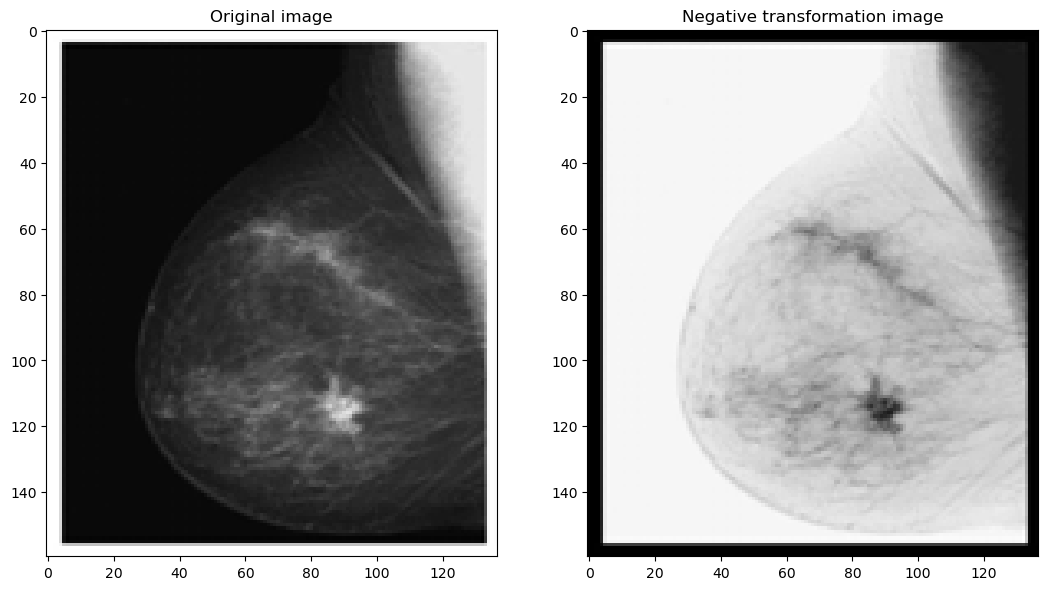

In [7]:
'''
1
Negative Transformation
'''

pic_1 = io.imread("./imgs/Picture1.png",as_gray=True)

negative_image = negative(pic_1)

show_images([pic_1,negative(pic_1)],["Original image", "Negative transformation image"])

In [8]:
'''
2
Contrast Enhancement
'''
# from sympy import re


def contrast_enhancement(image):
    result = np.interp(image,(0,1),(0,255))
    result = np.rint(result)
    # result = (image*255).astype(np.uint8)
    # print(result)
    
    for i in range (image.shape[0]):
        for j in range (image.shape[1]):
            if (result[i,j] < 100  and result[i,j] > 0):
                result[i,j] = (1.5*result[i,j]) + 50
    return result.astype(np.uint8)
    # return np.rint(result)
                


In [9]:
# def showHist(img,histogramImg):
#     plt.figure()
#     bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

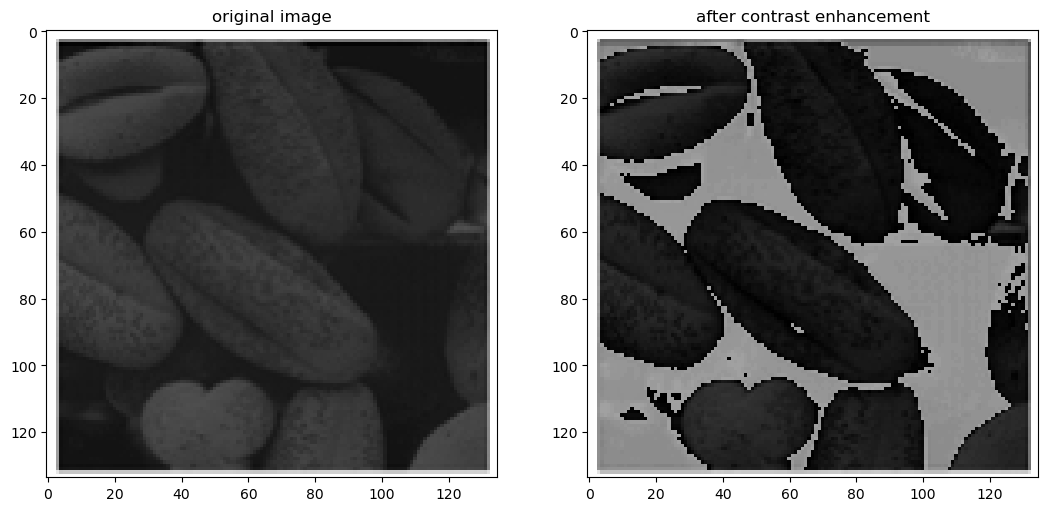

In [10]:
pic_2 = io.imread("./imgs/Picture2.png",as_gray = True)

contrast_enhancement_image = contrast_enhancement(pic_2)

show_images([pic_2,contrast_enhancement_image],["original image","after contrast enhancement"])


In [11]:
'''
3
Gamma Correction
'''

def gamma_correction(image, gamma=1,c=1):
   return c * np.power(image, gamma)
    

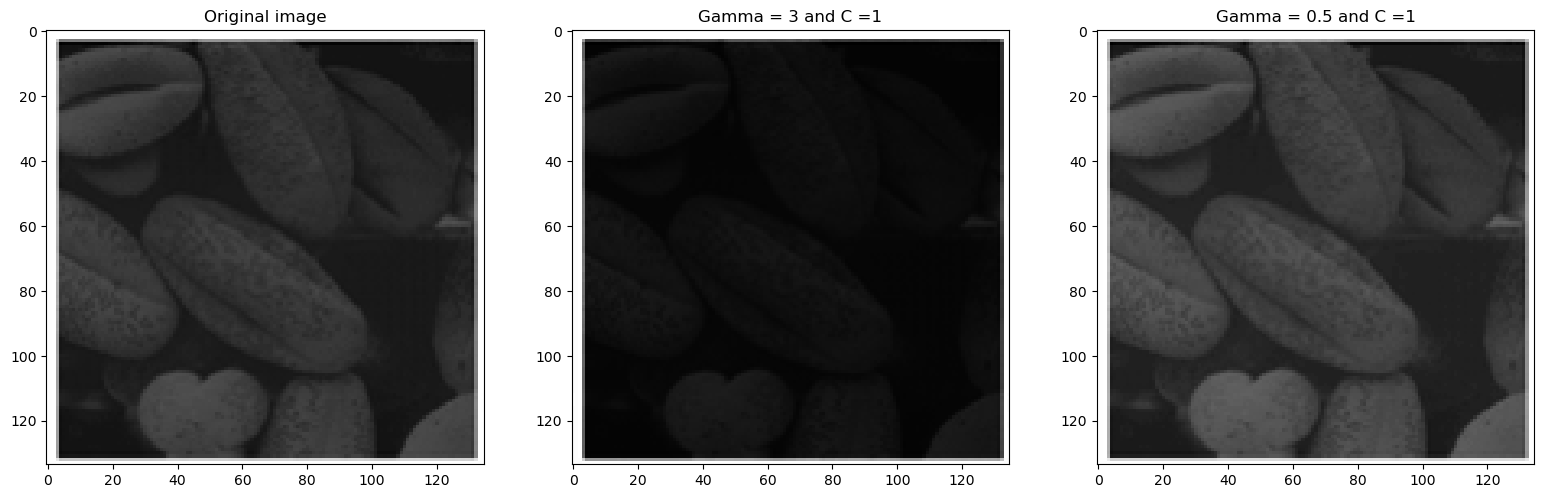

In [12]:
gamma_correction_image_3= gamma_correction(pic_2,gamma=3,c=1)
gamma_correction_image_0_5= gamma_correction(pic_2,gamma=0.5,c=1)

show_images([pic_2,gamma_correction_image_3,gamma_correction_image_0_5],["Original image","Gamma = 3 and C =1","Gamma = 0.5 and C =1"])
# show_images([pic_2,ex.adjust_gamma(gamma_correction_image_3,gamma = 3,gain = 1),ex.adjust_gamma(gamma_correction_image_0_5,gamma = 0.5,gain = 1)],["Original image","Gamma = 3 and C =1","Gamma = 0.5 and C =1"])


In [13]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

from numpy import cumsum


def getImageWithHist(name,ext,nbins=256):
    pass


def histogram_equalization(image):
    histogram_img , bin_centers= histogram(image)
    h = np.zeros(256)
    for i in range(len(histogram_img)):
        h[bin_centers[i]] = histogram_img[i]
            
    result = np.copy(image)
    h = cumsum(h)
    
    h = np.rint(255*h/(image.shape[1]*image.shape[0]))
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i][j] = h[image[i][j]]
    
    return result

In [14]:

pout = io.imread("D:\CMP #3\Image Processing\Labs\lab03-std\Lab-03-Smoothing-STD\pout.tif",as_gray = True)
tire = io.imread("D:\CMP #3\Image Processing\Labs\lab03-std\Lab-03-Smoothing-STD\/tire.tif",as_gray = True)


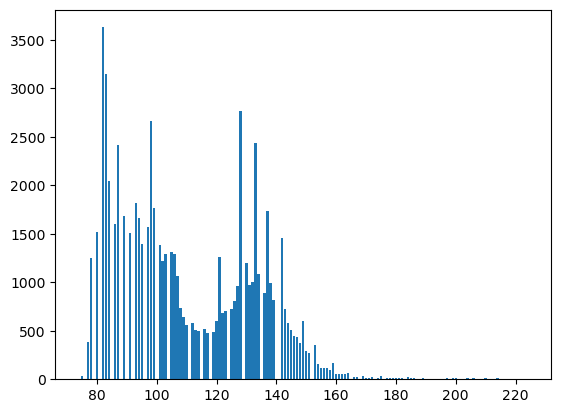

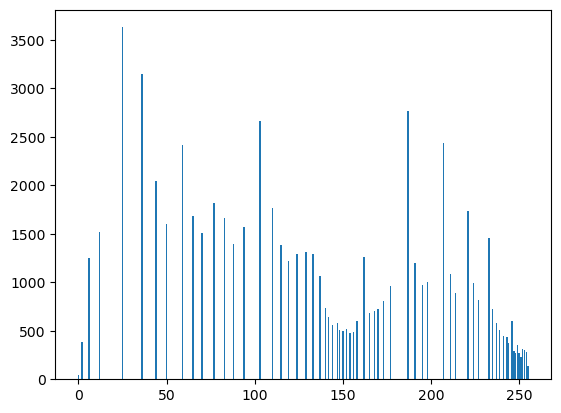

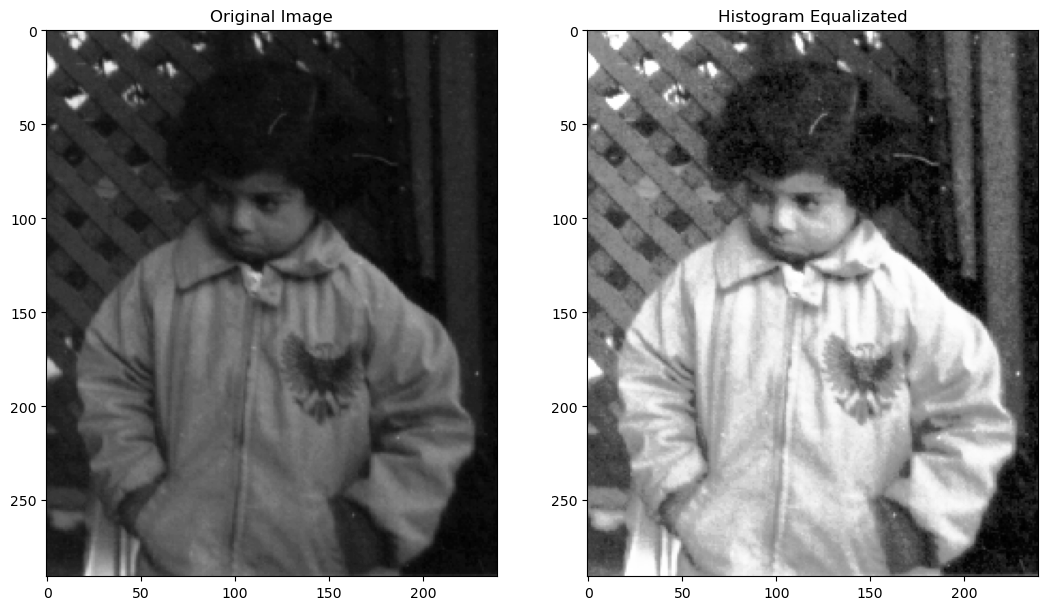

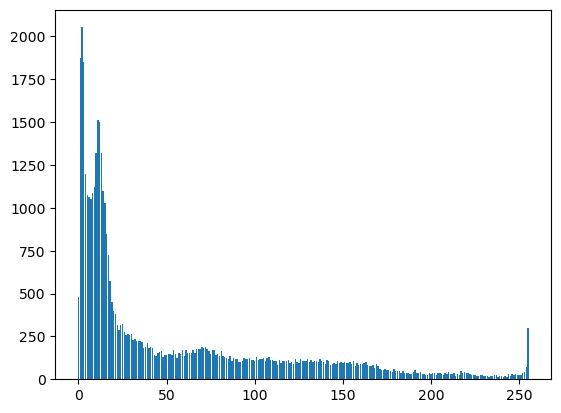

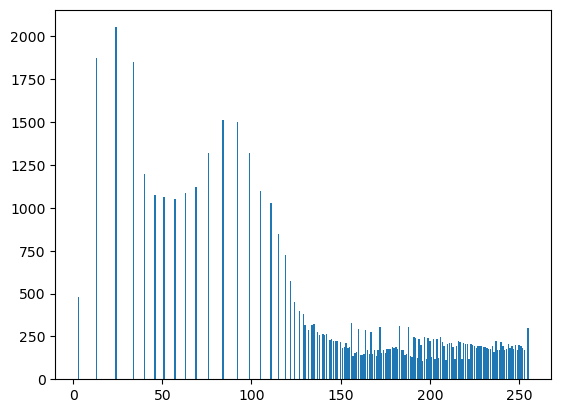

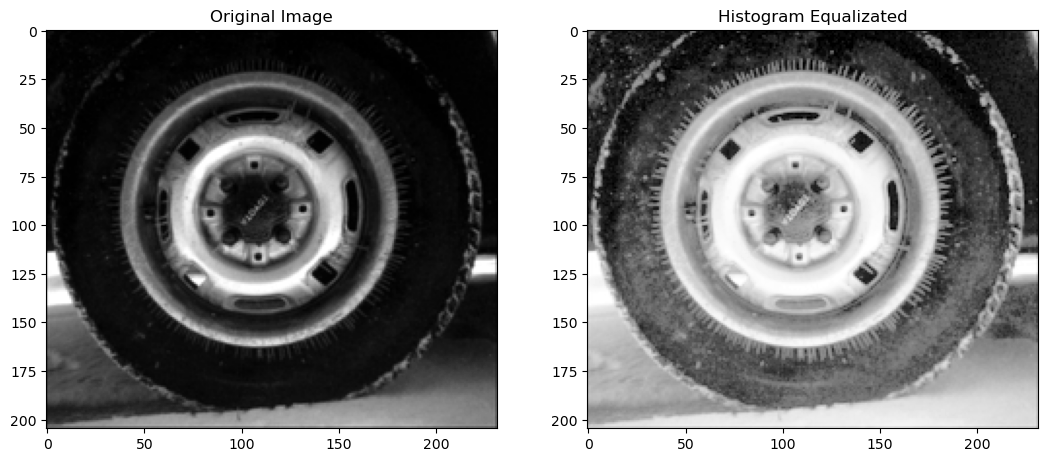

In [19]:
equalizeed_pout = histogram_equalization(pout)
equalizeed_tire = histogram_equalization(tire)
showHist(pout)
showHist(equalizeed_pout)
show_images([pout,equalizeed_pout],["Original Image", "Histogram Equalizated"])

showHist(tire)
showHist(equalizeed_tire)
show_images([tire,equalizeed_tire],["Original Image", "Histogram Equalizated"])


In [16]:
blue_img_1 = io.imread("./1.jpg")
blue_img_2 = io.imread("./2.jpg")

In [17]:

def blue_elimination(image):
    # hsv_img = rgb2hsv(image)
    result = np.copy(image)
    result[:,:,2] = histogram_equalization( result[:,:,2])
    return result
    
    

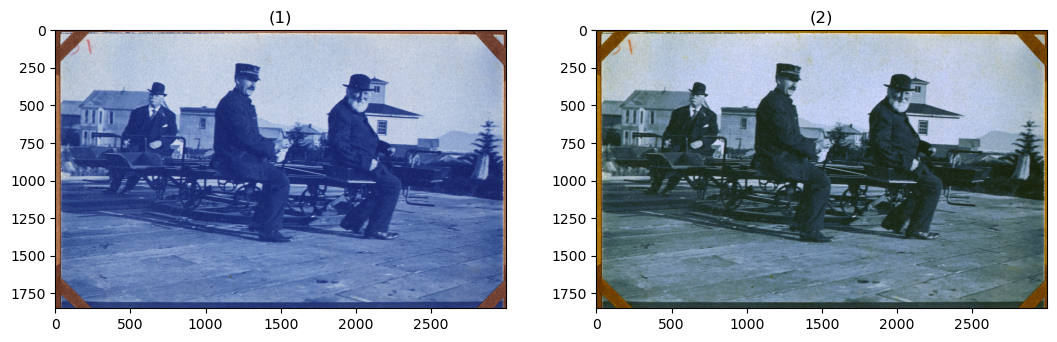

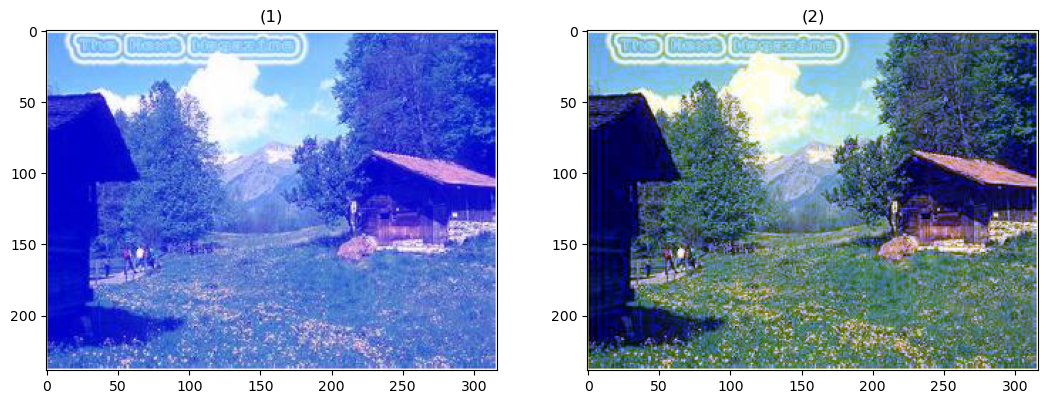

In [18]:
show_images([blue_img_1,blue_elimination(blue_img_1)])
show_images([blue_img_2,blue_elimination(blue_img_2)])
